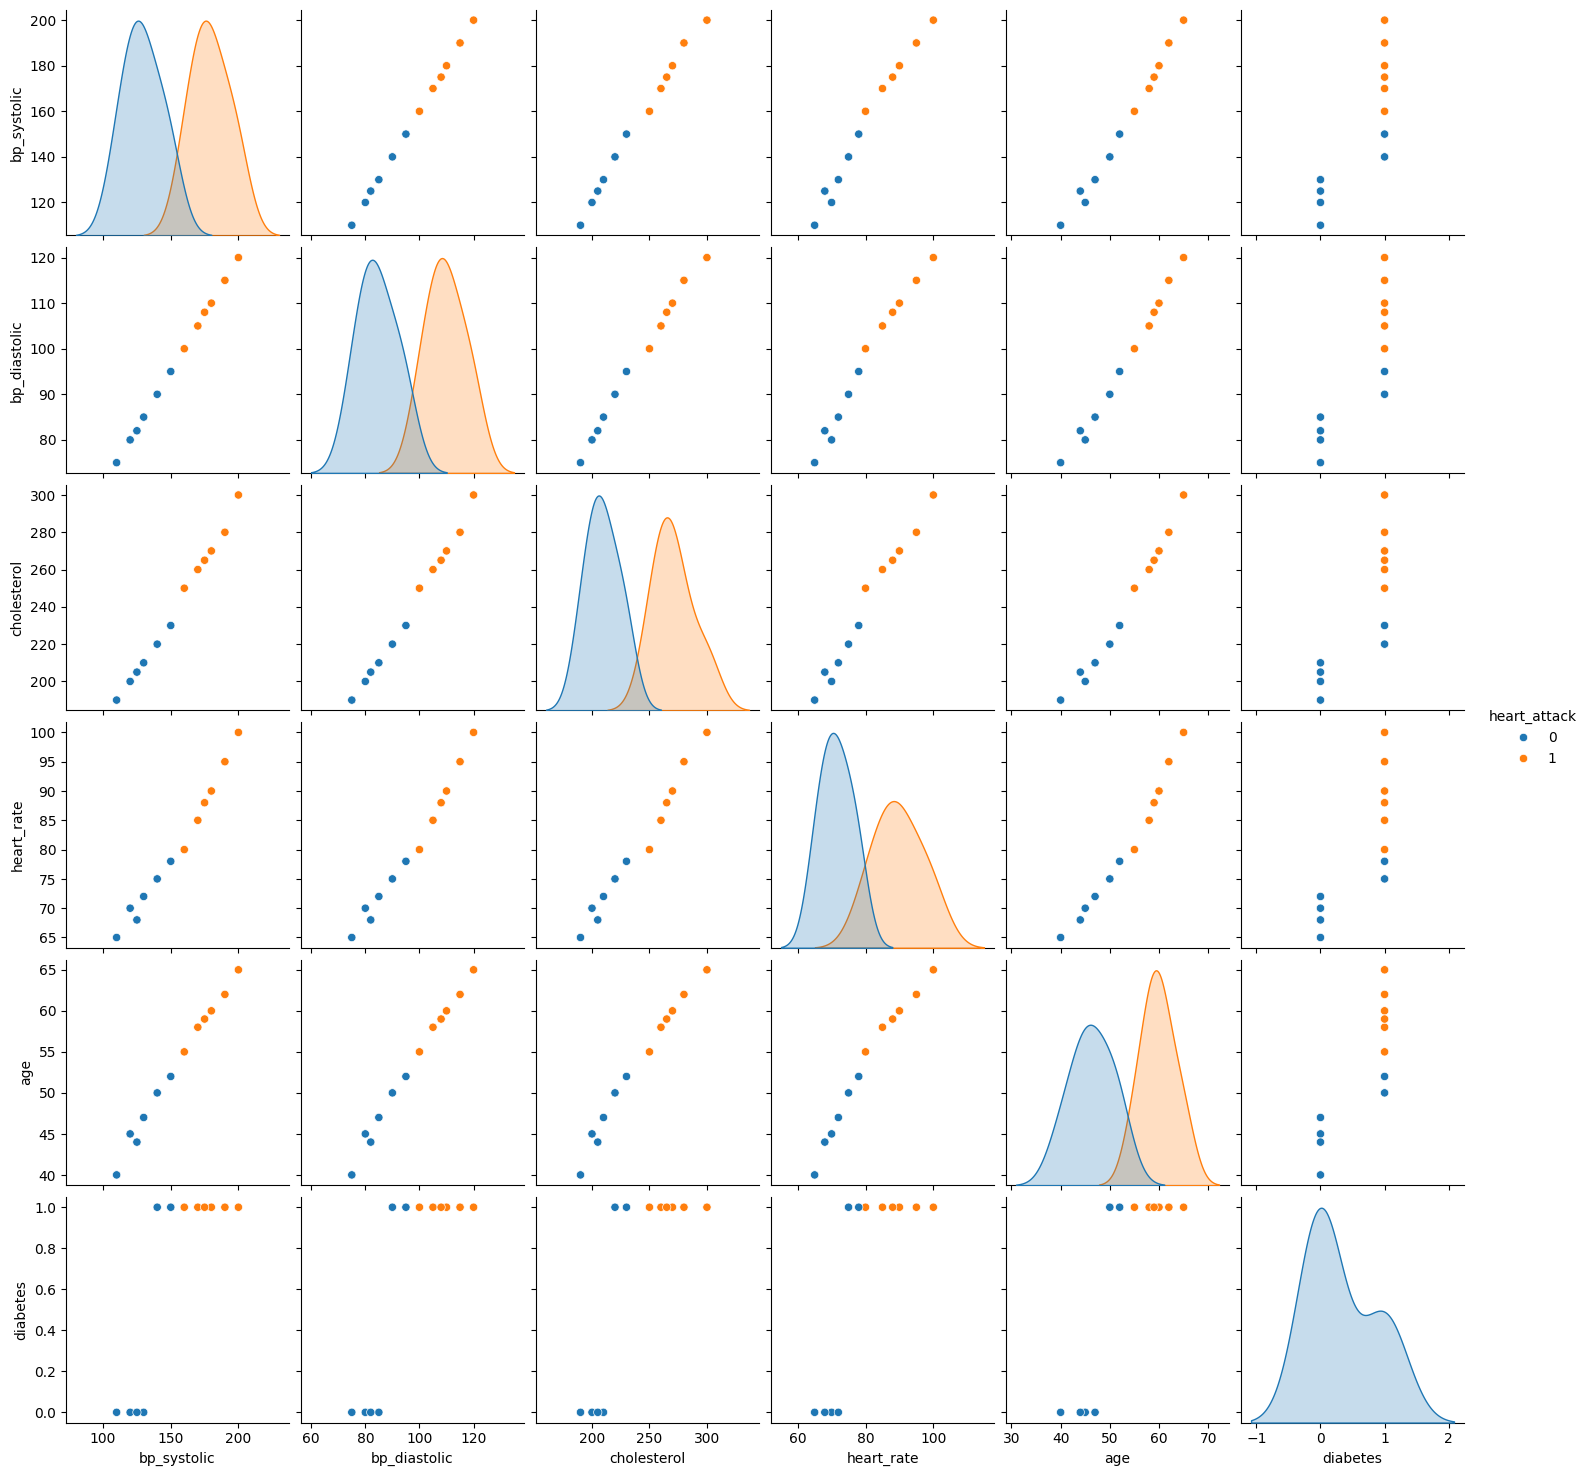

Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Prediction for new patient: Low Risk of Heart Attack


/home/ajay/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (You can replace this with actual BP and heart health data)
data = {
    "bp_systolic": [120, 140, 160, 180, 110, 150, 170, 190, 130, 125, 175, 200],
    "bp_diastolic": [80, 90, 100, 110, 75, 95, 105, 115, 85, 82, 108, 120],
    "cholesterol": [200, 220, 250, 270, 190, 230, 260, 280, 210, 205, 265, 300],
    "heart_rate": [70, 75, 80, 90, 65, 78, 85, 95, 72, 68, 88, 100],
    "age": [45, 50, 55, 60, 40, 52, 58, 62, 47, 44, 59, 65],
    "diabetes": [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],  # 1 = Has diabetes, 0 = No diabetes
    "heart_attack": [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]  # 1 = Heart attack, 0 = No heart attack
}

df = pd.DataFrame(data)

# Exploratory Data Analysis
sns.pairplot(df, hue="heart_attack")
plt.show()

# Split data into features (X) and target variable (y)
X = df.drop(columns=["heart_attack"])
y = df["heart_attack"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function to Predict Heart Attack based on New Data
def predict_heart_attack(bp_systolic, bp_diastolic, cholesterol, heart_rate, age, diabetes):
    input_data = np.array([[bp_systolic, bp_diastolic, cholesterol, heart_rate, age, diabetes]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    
    return "High Risk of Heart Attack" if prediction[0] == 1 else "Low Risk of Heart Attack"

# Example Prediction
new_bp_data = [4, 0, 40, 5, 5, 1]  # Example new patient data
result = predict_heart_attack(*new_bp_data)
print("Prediction for new patient:", result)
